<h2><div style="color:#EC7063;font-family:Courier New " > Importing the Dataset using Pandas. </div> </h2>

In [728]:
import pandas as pd
df=pd.read_csv("/Users/christopherdevairakkam/Desktop/slated_sample_training_data.csv")
df.head()

,production_id,title,release_date,budget,max_screens,genre,rating,cast,us_box_office,ww_box_office
0,724094,Invaders from Mars,1986-06-06,12000000.0,1212,"('horror',)",PG,"lonny_low,tony_cox,steven_lambert,kenneth_kimm...",4884663.0,4884663.0
1,1357727,The Lost Village,2018-10-19,0.0,1,"('documentary',)",Unrated,"chris_nickell,andretti_mullens,nicola_perry,da...",1780.0,1780.0
2,1416244,The Watcher,2000-09-08,35200000.0,2777,"('thriller', 'drama', 'crime', 'mystery')",R,"ryan_oliver,joey_sylvester,michael_guido,erick...",28946615.0,47267829.0
3,505158,Dylan Dog: Dead of Night,2011-03-16,20000000.0,875,"('action', 'comedy', 'crime', 'mystery', 'fant...",PG-13,"kevin_munroe,pamela_berk-rosenberg,lars_sylves...",1186538.0,5782515.0
4,410041,Convicts,1991-12-06,0.0,1,"('drama',)",Not Rated,"elliot_lewis,calvin_levels,peter_masterson,hor...",13623.0,13623.0


<h3><div  style="color:#273746 ;font-family:Courier New"> ____________________________________________________________________________________________</div></h3>

<h2><div  style="color:#2ECC71;font-family:Courier New"> Exploring the Dataset. </div></h2>

In [729]:
# Shape of the Dataframe
df.shape

(10841, 10)

In [730]:
# All columns in the Dataframe
df.columns

Index(['production_id', 'title', 'release_date', 'budget', 'max_screens',
       'genre', 'rating', 'cast', 'us_box_office', 'ww_box_office'],
      dtype='object')

In [731]:
# Nullcheck
df.isnull().sum()

production_id    0
title            0
release_date     0
budget           0
max_screens      0
genre            0
rating           0
cast             0
us_box_office    0
ww_box_office    0
dtype: int64

In [732]:
# Concise Summary of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   production_id  10841 non-null  int64  
 1   title          10841 non-null  object 
 2   release_date   10841 non-null  object 
 3   budget         10841 non-null  float64
 4   max_screens    10841 non-null  int64  
 5   genre          10841 non-null  object 
 6   rating         10841 non-null  object 
 7   cast           10841 non-null  object 
 8   us_box_office  10841 non-null  float64
 9   ww_box_office  10841 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 847.1+ KB


<h3><div  style="color:#273746 ;font-family:Courier New"> ____________________________________________________________________________________________</div></h3>

<h2><div style="color:#3498DB;font-family:Courier New "> Extracting US only Features and Target Variable. </div> </h2> 

In [733]:
df=df.loc[abs((df['us_box_office']-df['ww_box_office'])/df['us_box_office']) < 0.83,:]
df.reset_index(inplace=True)

us_features = df[['production_id', 'title', 'release_date', 'budget', 'max_screens',
       'genre', 'rating', 'cast']]
us_target =df[['us_box_office']]
us_features.info()
print("\n\n\n")
us_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7329 entries, 0 to 7328
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   production_id  7329 non-null   int64  
 1   title          7329 non-null   object 
 2   release_date   7329 non-null   object 
 3   budget         7329 non-null   float64
 4   max_screens    7329 non-null   int64  
 5   genre          7329 non-null   object 
 6   rating         7329 non-null   object 
 7   cast           7329 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 458.2+ KB




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7329 entries, 0 to 7328
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   us_box_office  7329 non-null   float64
dtypes: float64(1)
memory usage: 57.4 KB


<h3><div  style="color:#273746 ;font-family:Courier New"> ____________________________________________________________________________________________</div></h3>

<h2><div style="color:#7D3C98;font-family:Courier New  "> Budget Distribution Chart. </div> </h2> 

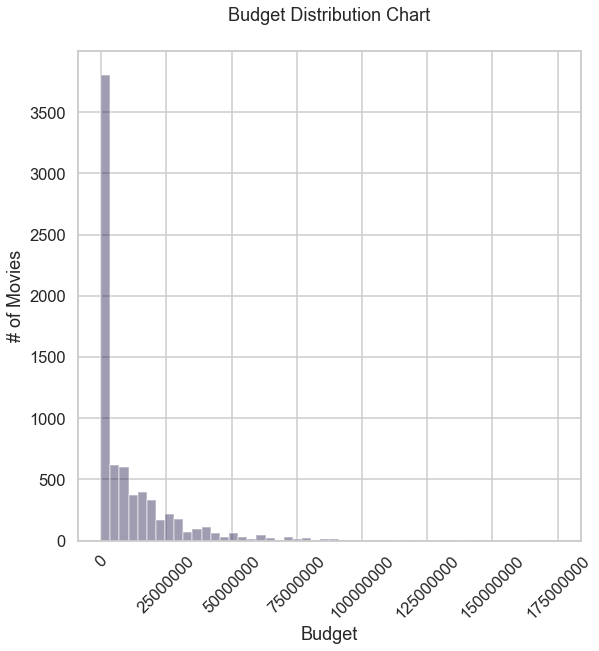

In [734]:
#Budget Distribution Chart
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("whitegrid")
plt.figure(figsize=(9,9))
sns.distplot(us_features['budget'],hist=True,kde=False,color="#120B40")
plt.title('Budget Distribution Chart',y=1.05)
plt.ylabel('# of Movies')
plt.xlabel("Budget")
plt.ticklabel_format(style='plain',axis='x')
plt.xticks(rotation=45)     
plt.show()

<h2><div style="color:#138D75;font-family:Courier New  "> Budget Distribution Chart Reveals the following <li> Some movies have budget = $0 or very less [Which is inaccurate] <li> Budget of most of the movies is less than  50 million  </div> </h2> 

<h2><div style="color:#DC1296 ;font-family:Courier New  "> Analyzing the discrepancy in the Budget. </div> </h2> 

In [735]:
# Number of movies with budget < $1 
print('Number of movies with budget < $1 = ',us_features.loc[us_features["budget"]<1,"budget"].count())

# Number of movies with US box office > $0
print('\nNumber of movies with US box office > $0=',us_features.loc[(us_features["budget"]<1) &(df['us_box_office'] > 0),"budget"].count())

# Percentage of Budget Discrepancy in the dataset

print('\nPercentage of Budget Discrepancy in the dataset= {}% '.format(round((us_features.loc[us_features["budget"]<1,"budget"].count()/us_features["budget"].count()),2)*100))



Number of movies with budget < $1 =  2527

Number of movies with US box office > $0= 2527

Percentage of Budget Discrepancy in the dataset= 34.0% 


<h3><div  style="color:#273746 ;font-family:Courier New"> ____________________________________________________________________________________________</div></h3>

<h2><div style="color:#616FAD ;font-family:Courier New  "> Imputing Budget Column <br> <br>
 <li>For every budget row, where budget = 0,retrieve the max_screens value. 
  <li> Calculate the median budget where budget >0 and max_screens =  value retrieved per row.  
      <li> Replace budget row with new value.
    </div> </h2> 

In [736]:
us_features["budget"]

0       12000000.0
1              0.0
2       35200000.0
3              0.0
4              0.0
           ...    
7324           0.0
7325           0.0
7326           0.0
7327    32000000.0
7328      250000.0
Name: budget, Length: 7329, dtype: float64

In [737]:

for i in range(0,len(us_features)):           
    if us_features["budget"][i] == 0:
        us_features["budget"][i] = us_features["budget"].median()
#        us_features["budget"][i] = us_features.loc[(us_features["max_screens"]==us_features["max_screens"][i])&(us_features["budget"]>0),"budget"].median()
import warnings
warnings.filterwarnings('ignore')
us_features["budget"].describe().astype(str)


count                7329.0
mean     11339032.188020194
std      15840404.743218256
min                  1100.0
25%               3000000.0
50%               3000000.0
75%              15000000.0
max             175000000.0
Name: budget, dtype: object

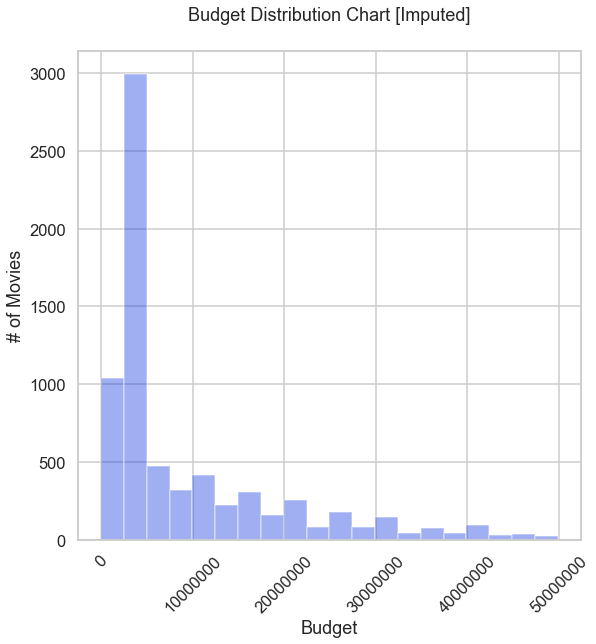

In [738]:
#Budget Distribution Chart after Imputing 
plt.figure(figsize=(9,9))
sns.set_context("talk")
sns.distplot(us_features.loc[us_features['budget'] < 50000000,"budget"],hist=True,bins=20,kde=False,color="#1237DC")
sns.set_style("whitegrid")
plt.title('Budget Distribution Chart [Imputed]',y=1.05)
plt.ylabel('# of Movies')
plt.xlabel("Budget")
plt.ticklabel_format(style='plain',axis='x')
plt.xticks(rotation=45)     
plt.show()

<h3><div  style="color:#273746 ;font-family:Courier New"> ____________________________________________________________________________________________</div></h3>

<h2><div style="color:#17ADAB;font-family:Courier New  "> Max Screen Distribution Chart. </div> </h2> 

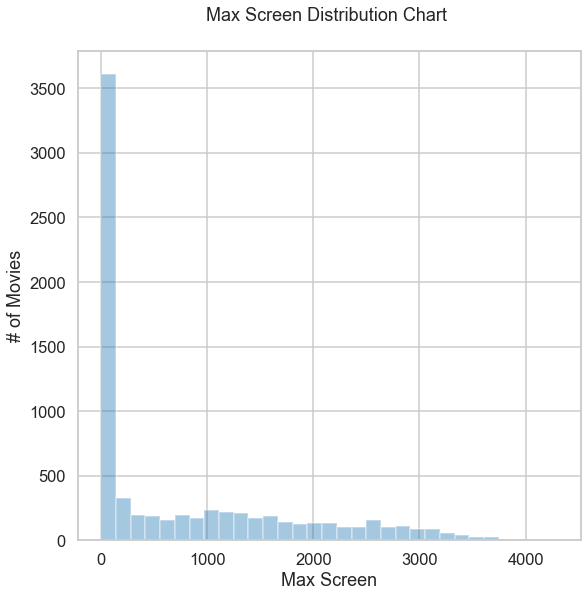

In [739]:
plt.figure(figsize=(9,9))
sns.distplot(us_features["max_screens"],hist=True,kde=False)
plt.title('Max Screen Distribution Chart ',y=1.05)
plt.ylabel('# of Movies')
plt.xlabel("Max Screen")
plt.show()

<h2><div style="color:#C026CA ;font-family:Courier New  ">Rating Pie Chart. </div> </h2> 

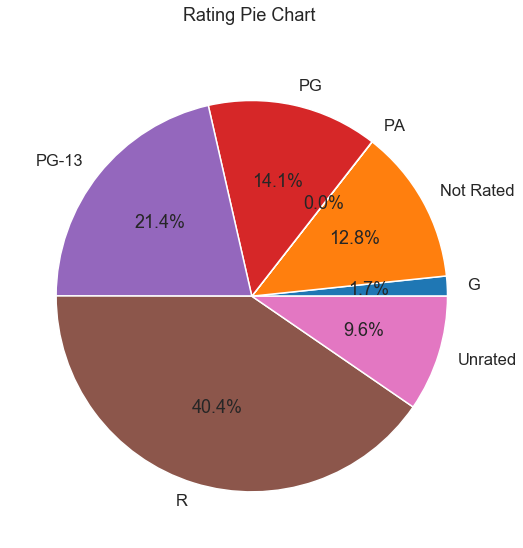

In [740]:
# Rating Pie Chart
plt.figure(figsize=(9,9))
us_features.groupby('rating')['rating'].count().plot.pie(autopct="%.1f%%")
plt.title('Rating Pie Chart ',y=1.05)
plt.ylabel(None)
plt.show()




<h2><div style="color:#26A5CA ;font-family:Courier New  ">Genre Pie Chart. </div> </h2> 

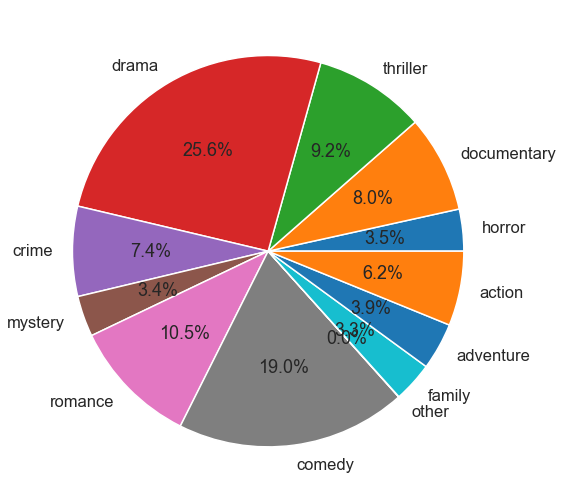

In [741]:
us_features["genre"]=us_features["genre"].str.replace("(","").str.replace(")","").str.replace("[']","").str.replace(","," ")
word_list=us_features["genre"].str.cat(sep=' ')
word_list=word_list.split()
word_dict={}
new_dict={}
for i in word_list:
    word_dict[i]= word_dict.get(i,0)+1
for k in word_dict :
    if word_dict[k] < 500:
        new_dict['other']=word_dict[k]
    else:
        new_dict[k]=word_dict[k]
labels = []
sizes = []

for x, y in new_dict.items():
    labels.append(x)
    sizes.append(y)

plt.figure(figsize=(9,9))
plt.pie(x=sizes,labels=labels,autopct='%1.1f%%')
plt.show()

<h3><div  style="color:#273746 ;font-family:Courier New"> ____________________________________________________________________________________________</div></h3>

<h2><div style="color:#C326CA  ;font-family:Courier New  ">Correlation Heat Map. </div> </h2> 

In [742]:
# Extracting Day of week, Month ,Day of Month and Year from Release Date 
us_features["release_date"]=pd.to_datetime(us_features["release_date"])
us_features['year']=us_features["release_date"].dt.strftime('%y')
us_features['month']=us_features["release_date"].dt.strftime('%m')
us_features['day']=us_features["release_date"].dt.strftime('%d')
us_features['week_day']=us_features["release_date"].dt.strftime('%w')
us_features.loc[1:5,'year':]

,year,month,day,week_day
1,18,10,19,5
2,00,09,08,5
3,91,12,06,5
4,91,06,21,5
5,08,02,02,6


In [743]:
# Log Transformation of all Numerical columns 
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(us_features[['year']])
# Apply the power transform to the data
us_features[['year']]= pow_trans.transform(us_features[['year']])

# Train the transform on the data
pow_trans.fit(us_features[['month']])
# Apply the power transform to the data
us_features[['month']]= pow_trans.transform(us_features[['month']])

# Train the transform on the data
pow_trans.fit(us_features[['day']])
# Apply the power transform to the data
us_features[['day']]= pow_trans.transform(us_features[['day']])

# Train the transform on the data
pow_trans.fit(us_features[['week_day']])
# Apply the power transform to the data
us_features[['week_day']]= pow_trans.transform(us_features[['week_day']])

# Train the transform on the data
#pow_trans.fit(us_features[['budget']])
# Apply the power transform to the data
#us_features[['budget']]= pow_trans.transform(us_features[['budget']])


# Train the transform on the data
#pow_trans.fit(us_features[['max_screens']])
# Apply the power transform to the data
#us_features[['max_screens']]= pow_trans.transform(us_features[['max_screens']])

# Train the transform on the data
#us_features[['us_box_office']]=us_target[['us_box_office']]
#pow_trans.fit(us_features[['us_box_office']])
# Apply the power transform to the data
#us_features[['us_box_office']]= pow_trans.transform(us_features[['us_box_office']])

us_features.head()

,production_id,title,release_date,budget,max_screens,genre,rating,cast,year,month,day,week_day
0,724094,Invaders from Mars,1986-06-06,12000000.0,1212,horror,PG,"lonny_low,tony_cox,steven_lambert,kenneth_kimm...",1.102702,-0.135389,-1.030210,0.457821
1,1357727,The Lost Village,2018-10-19,3000000.0,1,documentary,Unrated,"chris_nickell,andretti_mullens,nicola_perry,da...",-0.212604,0.986101,0.471415,0.457821
2,1416244,The Watcher,2000-09-08,35200000.0,2777,thriller drama crime mystery,R,"ryan_oliver,joey_sylvester,michael_guido,erick...",-2.102231,0.713457,-0.767608,0.457821
3,410041,Convicts,1991-12-06,3000000.0,1,drama,Not Rated,"elliot_lewis,calvin_levels,peter_masterson,hor...",1.156368,1.519168,-1.030210,0.457821
4,1535430,Whore,1991-06-21,3000000.0,52,drama,R,"ronaldo_vasconcellos,ginger_lynn,michael_crabt...",1.156368,-0.135389,0.673448,0.457821


In [744]:
# Creating Sparse Matrix from Genre Column
for a,b in word_dict.items():
    us_features[a]=0
for i in range(0,len(us_features)):
    temp_list=[]
    temp_list = us_features["genre"][i].split()
    temp_list = [el.replace("'", '') for el in temp_list]
    for j in temp_list:
        us_features[j][i] = 1


In [745]:
# Creating Sparse Matrix from Cast Column
cast_dict={}
cast_new_dict={}
us_features["cast"]=us_features["cast"].str.replace("(","").str.replace(")","").str.replace("[']","").str.replace(","," ")
cast_list=us_features["cast"].str.cat(sep=' ')
cast_list=cast_list.split()
for i in cast_list:
    cast_dict[i]= cast_dict.get(i,0)+1

import category_encoders as ce
#Create an object for Base N Encoding
encoder= ce.BaseNEncoder(cols=['cast'],return_df=True,base=8)

cast_encoded=encoder.fit_transform(us_features)
us_features=cast_encoded

In [746]:
# Label Encoding Rating Column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
us_features["rating"]=le.fit_transform(us_features["rating"])

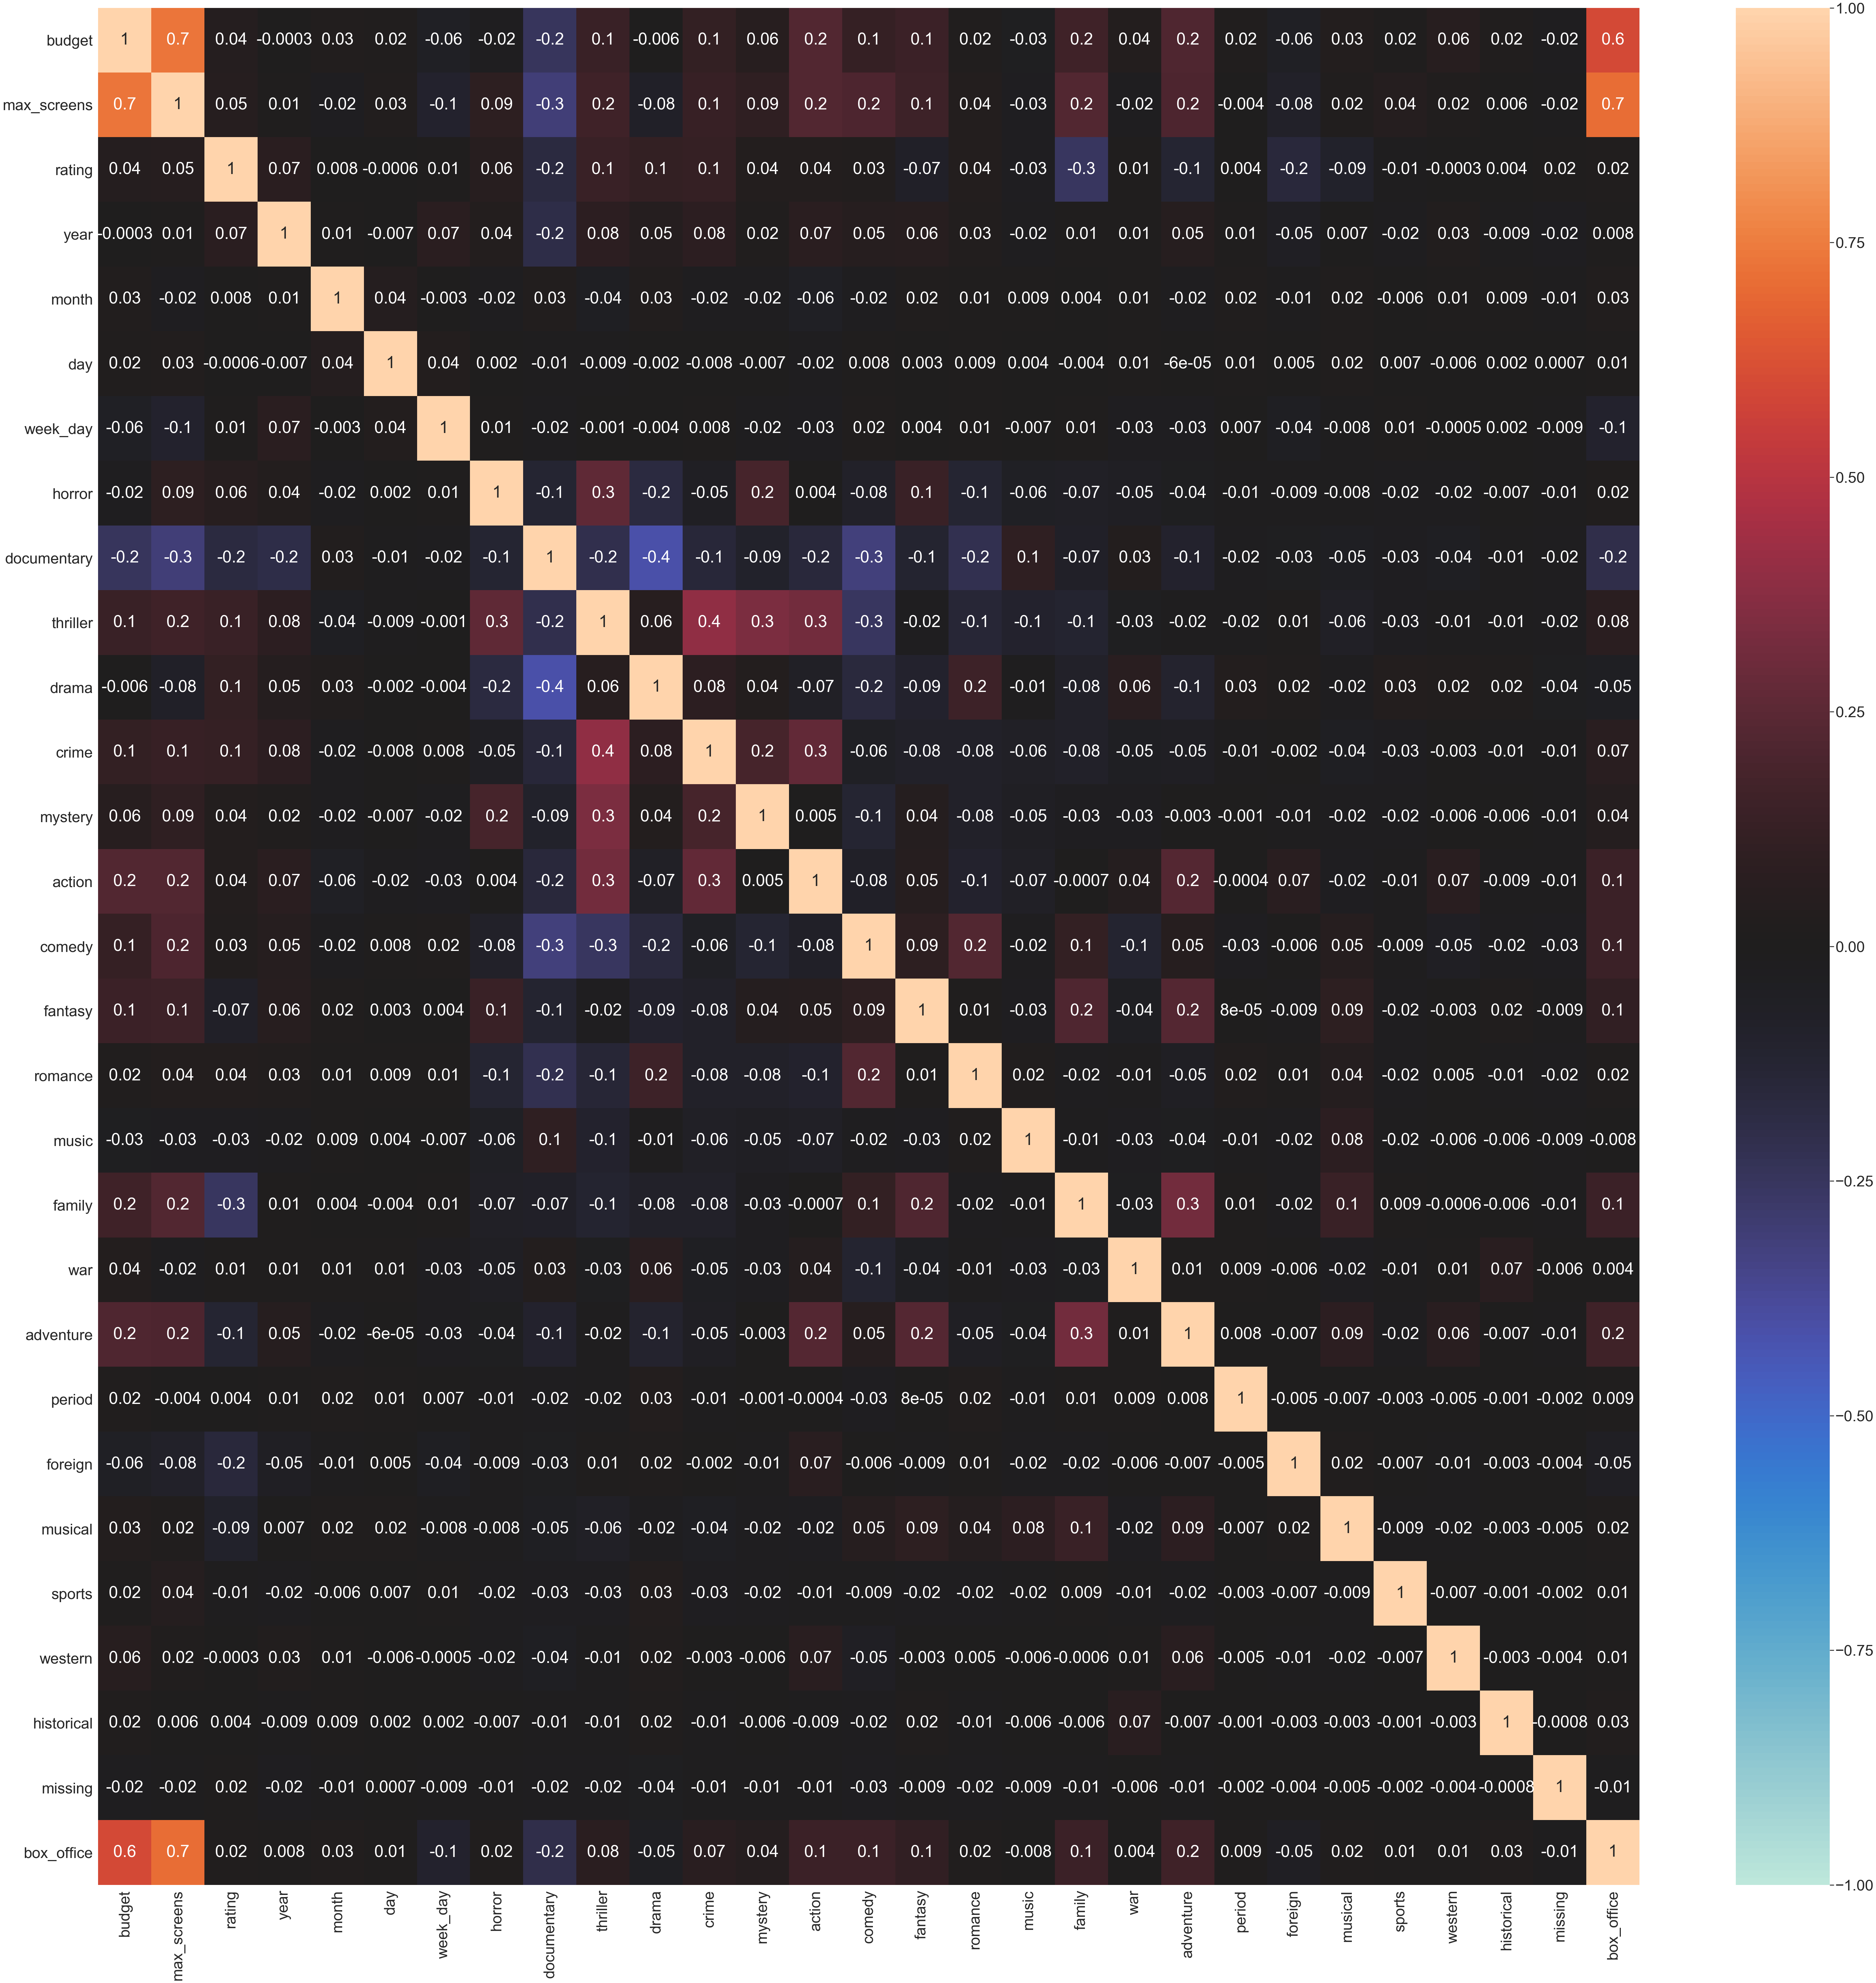

In [747]:
sns.set_context('poster',font_scale=2)
plt.figure(figsize=(100,100))
cor_list=['title','budget', 'max_screens','genre', 'rating', 'year', 'month', 'day', 'week_day', 'horror', 'documentary','thriller', 'drama', 'crime', 'mystery', 'action', 'comedy', 'fantasy','romance', 'music', 'family', 'war', 'adventure', 'period', 'foreign','musical', 'sports', 'western', 'historical', 'missing', 'box_office']
us_features["box_office"] = us_target["us_box_office"]
sns.heatmap(us_features[cor_list].corr(),annot=True,cmap='icefire',fmt = '.1g',vmin=-1,vmax=1,center=0)
plt.show()


<h3><div style="color:#4A4BA7  ;font-family:Courier New  "> Model Building <br><br> Splitting Data into Train and Test </div> </h3> 

In [748]:
from sklearn.model_selection import train_test_split
X=us_features[[ 'budget', 'max_screens', 'rating', 'cast_0', 'cast_1', 'cast_2', 'cast_3', 'cast_4',
       'cast_5', 'year', 'month', 'day', 'week_day', 'horror', 'documentary',
       'thriller', 'drama', 'crime', 'mystery', 'action', 'comedy', 'fantasy',
       'romance', 'music', 'family', 'war', 'adventure', 'period', 'foreign',
       'musical', 'sports', 'western', 'historical', 'missing']]
y= us_features[["box_office"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)


<h3><div style="color:#4A4BA7  ;font-family:Courier New  ">  Initial Run </div> </h3> 

In [765]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 18945688.441098


<h3><div style="color:#4A4BA7  ;font-family:Courier New  ">  Tuning </div> </h3> 

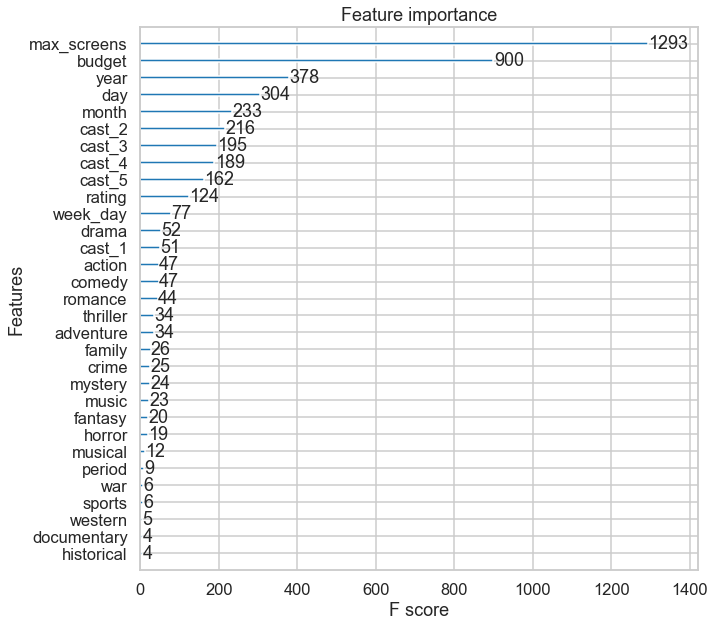

In [766]:
# Feature Importance
sns.set_context('talk',font_scale=1)
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [782]:

X=us_features[['budget','year', 'max_screens', 'rating', 'cast_2', 'cast_3', 'cast_4','cast_5', 'month', 'day', 'week_day','cast_1','action','drama','romance','comedy','adventure']]
y= us_features[["box_office"]]


In [783]:
X=X[[ 'budget','year', 'max_screens', 'rating','month', 'day', 'week_day']]

In [812]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.1, 0.5, 0.8, 1],
    'n_estimators': [10,50,100,200],
    'max_depth': [2,5,10,20]
    
}

# Instantiate the regressor: gbm

gbm = xgb.XGBRegressor(learning_rate=0.1,importance_type='gain',booster='gbtree',gamma=30,subsample=0.5,reg_lambda=20,reg_alpha=20,num_parallel_tree=4)

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,
                        scoring='neg_mean_squared_error', cv=4, verbose=1,n_jobs=10)
grid_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))


Fitting 4 folds for each of 64 candidates, totalling 256 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    3.5s
[Parallel(n_jobs=10)]: Done 210 tasks      | elapsed:   58.6s
[Parallel(n_jobs=10)]: Done 256 out of 256 | elapsed:  1.7min finished


Best parameters found:  {'colsample_bytree': 0.8, 'max_depth': 5, 'n_estimators': 100}
Lowest RMSE found:  17761701.681339197


<h1><div style="color:#CC20A0  ;font-family:Courier New  "> 
Best parameters found: colsample_bytree: 0.8, max_depth: 5, n_estimators: 100
<br><br>Lowest RMSE found:  17761701.681339197 </div> </h1> 